In [20]:
import pymongo
import pandas as pd
import re
import seaborn
import matplotlib.pyplot as plt # plot 관련
import matplotlib.font_manager # font 관련
%matplotlib inline

In [21]:
matplotlib.rc('font', family='HCR Dotum') # font 지정

In [22]:
client = pymongo.MongoClient('localhost', 27017)
db = client['lol_database']
games = db.games
players = db.players

In [23]:
type(games.find())

pymongo.cursor.Cursor

In [24]:
game_df = pd.DataFrame(list(games.find()), columns = ['date', 'title', 'stage', 'win_team', 'res', 'opp_team'])

In [25]:
game_df

,date,title,stage,win_team,res,opp_team
0,2017.04.01,2017 롤챔스 스프링,44일차 2경기 2세트,SKT T1,W,MVP
1,2017.04.01,2017 롤챔스 스프링,44일차 2경기 1세트,SKT T1,W,MVP
2,2017.03.29,2017 롤챔스 스프링,42일차 1경기 3세트,SKT T1,W,ROX 타이거즈
3,2017.03.29,2017 롤챔스 스프링,42일차 1경기 2세트,SKT T1,L,ROX 타이거즈
4,2017.03.29,2017 롤챔스 스프링,42일차 1경기 1세트,SKT T1,W,ROX 타이거즈
5,2017.03.25,2017 롤챔스 스프링,39일차 1경기 2세트,SKT T1,L,삼성 갤럭시
6,2017.03.25,2017 롤챔스 스프링,39일차 1경기 1세트,SKT T1,L,삼성 갤럭시
7,2017.03.22,2017 롤챔스 스프링,37일차 2경기 3세트,SKT T1,W,롱주 게이밍
8,2017.03.22,2017 롤챔스 스프링,37일차 2경기 2세트,SKT T1,W,롱주 게이밍
9,2017.03.22,2017 롤챔스 스프링,37일차 2경기 1세트,SKT T1,L,롱주 게이밍


In [26]:
player_df = pd.DataFrame(list(players.find()), columns=['date', 'title', 'player', 'champion', 'res', 'K','D','A','KDA', 'help'])

In [8]:
player_df

,date,title,player,champion,res,K,D,A,KDA,help
0,2017.04.01,2017 롤챔스 스프링,SKT T1 Huni,럼블,W,5,0,8,15.6,72%
1,2017.04.01,2017 롤챔스 스프링,SKT T1 Peanut,렝가,W,3,2,3,3,33%
2,2017.04.01,2017 롤챔스 스프링,SKT T1 Faker,신드라,W,8,4,5,3.3,72%
3,2017.04.01,2017 롤챔스 스프링,SKT T1 Bang,이즈리얼,W,2,0,5,8.4,39%
4,2017.04.01,2017 롤챔스 스프링,SKT T1 Wolf,탐 켄치,W,0,0,5,6,28%
5,2017.04.01,2017 롤챔스 스프링,SKT T1 Huni,피즈,W,5,1,7,12,52%
6,2017.04.01,2017 롤챔스 스프링,SKT T1 Peanut,그레이브즈,W,11,1,8,19,83%
7,2017.04.01,2017 롤챔스 스프링,SKT T1 Faker,아리,W,2,2,10,6,52%
8,2017.04.01,2017 롤챔스 스프링,SKT T1 Bang,애쉬,W,5,1,8,13,57%
9,2017.04.01,2017 롤챔스 스프링,SKT T1 Wolf,미스 포츈,W,0,0,14,16.8,61%


데이터 type변경

In [27]:
game_df['date'] = game_df['date'].apply(pd.to_datetime)

In [28]:
player_df['date'] = player_df['date'].apply(pd.to_datetime)

In [64]:
player_df[['K','D','A', 'KDA']] = player_df[['K','D','A', 'KDA']].apply(pd.to_numeric)

In [30]:
player_df['help'] = player_df['help'].str.replace('%', '').apply(pd.to_numeric)/100

In [105]:
player_df.query('D==0')

,date,title,player,champion,res,K,D,A,KDA,help,year,month,day
0,2017-04-01,2017 롤챔스 스프링,Huni,럼블,W,5,0,8,15.6,0.72,2017,4,1
3,2017-04-01,2017 롤챔스 스프링,Bang,이즈리얼,W,2,0,5,8.4,0.39,2017,4,1
4,2017-04-01,2017 롤챔스 스프링,Wolf,탐 켄치,W,0,0,5,6.0,0.28,2017,4,1
9,2017-04-01,2017 롤챔스 스프링,Wolf,미스 포츈,W,0,0,14,16.8,0.61,2017,4,1
21,2017-03-29,2017 롤챔스 스프링,Peanut,그레이브즈,W,8,0,7,18.0,0.79,2017,3,29
22,2017-03-29,2017 롤챔스 스프링,Faker,카시오페아,W,5,0,9,16.8,0.74,2017,3,29
36,2017-03-22,2017 롤챔스 스프링,Peanut,리 신,W,6,0,8,16.8,0.78,2017,3,22
39,2017-03-22,2017 롤챔스 스프링,Wolf,나미,W,0,0,15,18.0,0.83,2017,3,22
41,2017-03-22,2017 롤챔스 스프링,Peanut,카직스,W,4,0,3,8.4,0.64,2017,3,22
42,2017-03-22,2017 롤챔스 스프링,Faker,카시오페아,W,5,0,3,9.6,0.73,2017,3,22


In [107]:
player_df.merge(game_df)

,date,title,player,champion,res,K,D,A,KDA,help,year,month,day,stage,win_team,opp_team
0,2017-04-01,2017 롤챔스 스프링,Huni,럼블,W,5,0,8,15.6,0.72,2017,4,1,44일차 2경기 2세트,SKT T1,MVP
1,2017-04-01,2017 롤챔스 스프링,Huni,럼블,W,5,0,8,15.6,0.72,2017,4,1,44일차 2경기 1세트,SKT T1,MVP
2,2017-04-01,2017 롤챔스 스프링,Peanut,렝가,W,3,2,3,3.0,0.33,2017,4,1,44일차 2경기 2세트,SKT T1,MVP
3,2017-04-01,2017 롤챔스 스프링,Peanut,렝가,W,3,2,3,3.0,0.33,2017,4,1,44일차 2경기 1세트,SKT T1,MVP
4,2017-04-01,2017 롤챔스 스프링,Faker,신드라,W,8,4,5,3.3,0.72,2017,4,1,44일차 2경기 2세트,SKT T1,MVP
5,2017-04-01,2017 롤챔스 스프링,Faker,신드라,W,8,4,5,3.3,0.72,2017,4,1,44일차 2경기 1세트,SKT T1,MVP
6,2017-04-01,2017 롤챔스 스프링,Bang,이즈리얼,W,2,0,5,8.4,0.39,2017,4,1,44일차 2경기 2세트,SKT T1,MVP
7,2017-04-01,2017 롤챔스 스프링,Bang,이즈리얼,W,2,0,5,8.4,0.39,2017,4,1,44일차 2경기 1세트,SKT T1,MVP
8,2017-04-01,2017 롤챔스 스프링,Wolf,탐 켄치,W,0,0,5,6.0,0.28,2017,4,1,44일차 2경기 2세트,SKT T1,MVP
9,2017-04-01,2017 롤챔스 스프링,Wolf,탐 켄치,W,0,0,5,6.0,0.28,2017,4,1,44일차 2경기 1세트,SKT T1,MVP


In [106]:
player_df.groupby('date')[['KDA']].mean()

,KDA
date,
2014-12-03,8.650000
2014-12-06,6.640000
2014-12-11,10.650000
2014-12-17,8.330000
2014-12-20,12.780000
2015-01-07,6.926667
2015-01-10,1.660000
2015-01-16,7.610000
2015-01-23,12.720000


In [31]:
game_pivot = game_df.pivot_table(index = ['opp_team'] , columns = 'res', aggfunc = {'res' : 'count'}, fill_value=0)

In [32]:
game_pivot

res    
res                  L   W
opp_team                  
CJ Entus             4   5
CJ 엔투스               3  11
ESC Ever             2   3
GE Tigers            2   6
HUYA Tigers          0   2
Incredible Miracle   0   6
Jin Air GreenWings   2   2
KT Rolster           2   5
KT 롤스터               9  19
MVP                  0   8
Najin e-mFire        2   6
ROX 타이거즈             6  12
Samsung Galaxy       0   6
bbq olivers          0   4
e엠파이어                1   2
kt 롤스터               0   3
나진 e엠파이어             1   4
레블즈 아나키              0   2
롱주 IM                0   4
롱주 게이밍               6   8
삼성                   1   8
삼성 갤럭시               3   6
스베누 소닉붐              0   8
아나키                  1   2
아프리카 프릭스            10   5
진에어 그린윙스             6  16
콩두 몬스터               0   6
쿠 타이거즈               0   4

In [94]:
game_df.pivot_table(index=['title'], columns = 'res', aggfunc={'res' : 'count'}, fill_value=0)

res    
res                          L   W
title                             
2015 롤챔스 코리아 프리시즌            1   9
2015 스베누 롤챔스 코리아 섬머          6  35
2015 스베누 롤챔스 코리아 섬머 포스트 시즌   0   3
2015 스베누 롤챔스 코리아 스프링         9  23
2015 스베누 롤챔스 코리아 스프링 포스트시즌   2   6
2016 꼬깔콘 롤챔스 코리아 스프링        15  26
2016 꼬깔콘 롤챔스 코리아 스프링 PS      2   9
2016 롤챔스 코리아 섬머 포스트 시즌       3   2
2016 코카콜라 제로 롤챔스 코리아 섬머     13  28
2017 롤챔스 스프링                10  32

플레이어 이름 중 팀명 제거

In [33]:
player_df['player'] = player_df['player'].str.replace('SKT T1 ', '')

In [34]:
player_df['player'] = player_df['player'].str.replace('SKT ', '')

In [35]:
player_df['player'] = player_df['player'].str.replace('wolf', 'Wolf')

In [36]:
# player의 champion 사용현황
player_use_champion_pivot = player_df.pivot_table(index = ['player'] , columns = 'champion', aggfunc = {'champion' : 'count'}, fill_value=0)

In [39]:
player_champ_KDA_groupby = player_df.groupby(['title','player','champion'])[['K','D','A']].mean()

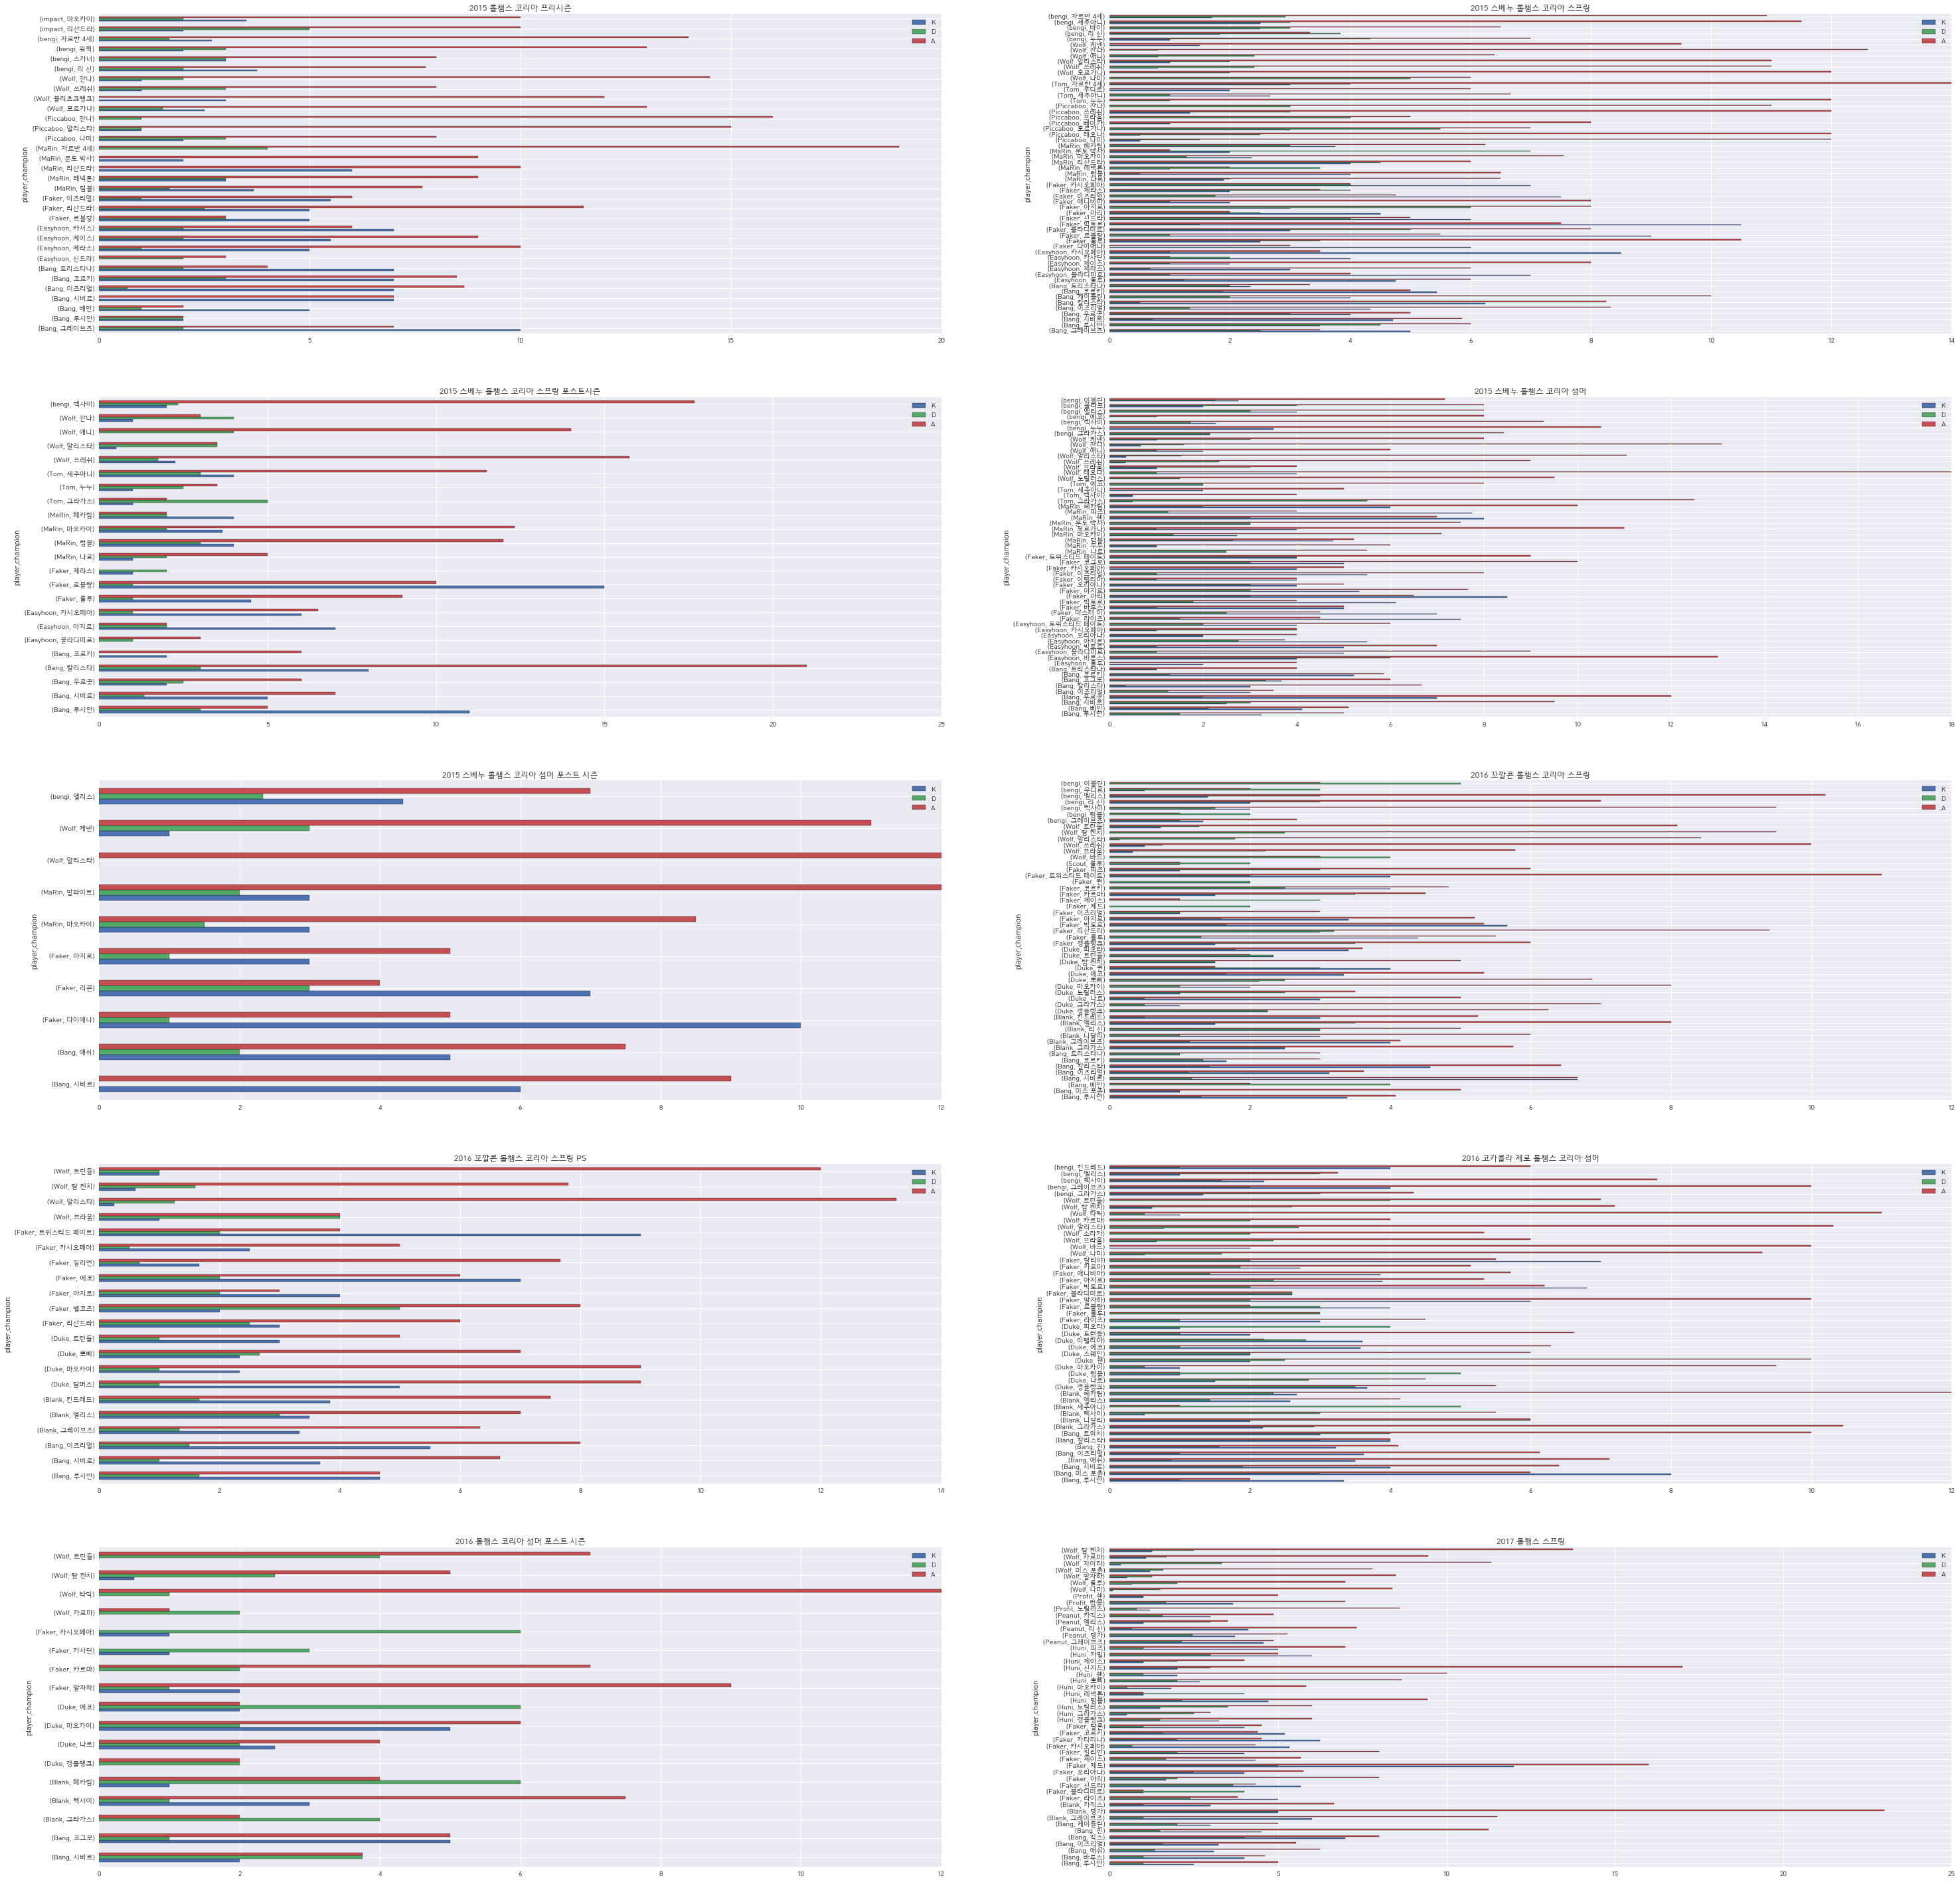

In [53]:
f,a = plt.subplots(5,2)
player_champ_KDA_groupby.xs('2015 롤챔스 코리아 프리시즌').plot(kind='barh', ax=a[0][0], figsize=[50,50], title="2015 롤챔스 코리아 프리시즌")
player_champ_KDA_groupby.xs('2015 스베누 롤챔스 코리아 스프링').plot(kind='barh', ax=a[0][1], figsize=[50,50], title="2015 스베누 롤챔스 코리아 스프링")
player_champ_KDA_groupby.xs('2015 스베누 롤챔스 코리아 스프링 포스트시즌').plot(kind='barh', ax=a[1][0], figsize=[50,50], title="2015 스베누 롤챔스 코리아 스프링 포스트시즌")
player_champ_KDA_groupby.xs('2015 스베누 롤챔스 코리아 섬머').plot(kind='barh', ax=a[1][1], figsize=[50,50], title="2015 스베누 롤챔스 코리아 섬머")
player_champ_KDA_groupby.xs('2015 스베누 롤챔스 코리아 섬머 포스트 시즌').plot(kind='barh', ax=a[2][0], figsize=[50,50], title="2015 스베누 롤챔스 코리아 섬머 포스트 시즌")
player_champ_KDA_groupby.xs('2016 꼬깔콘 롤챔스 코리아 스프링').plot(kind='barh', ax=a[2][1], figsize=[50,50], title="2016 꼬깔콘 롤챔스 코리아 스프링")
player_champ_KDA_groupby.xs('2016 꼬깔콘 롤챔스 코리아 스프링 PS').plot(kind='barh', ax=a[3][0], figsize=[50,50], title="2016 꼬깔콘 롤챔스 코리아 스프링 PS")
player_champ_KDA_groupby.xs('2016 코카콜라 제로 롤챔스 코리아 섬머').plot(kind='barh', ax=a[3][1], figsize=[50,50], title="2016 코카콜라 제로 롤챔스 코리아 섬머")
player_champ_KDA_groupby.xs('2016 롤챔스 코리아 섬머 포스트 시즌').plot(kind='barh', ax=a[4][0], figsize=[50,50], title="2016 롤챔스 코리아 섬머 포스트 시즌")
player_champ_KDA_groupby.xs('2017 롤챔스 스프링').plot(kind='barh', ax=a[4][1], figsize=[50,50], title="2017 롤챔스 스프링")

In [54]:
f.savefig("aaa.png")

대회 날짜 년,월,일 분류

In [41]:
game_df['year'] = game_df['date'].dt.year; game_df['month'] = game_df['date'].dt.month; game_df['day']=game_df['date'].dt.day

In [42]:
player_df['year'] = player_df['date'].dt.year; player_df['month'] = player_df['date'].dt.month; player_df['day']=player_df['date'].dt.day

In [43]:
# 대회별 player들의 champion 사용현황
title_by_champion = player_df.pivot_table(index=['title', 'player'], columns='champion', aggfunc={'champion':'count'}, fill_value=0)

In [44]:
title_by_champion

champion                                 \
champion                                갱플랭크 그라가스 그레이브즈  나르  나미 노틸러스 누누 니달리   
title                      player                                             
2015 롤챔스 코리아 프리시즌          Bang            0    0     1   0   0    0  0   0   
                           Easyhoon        0    0     0   0   0    0  0   0   
                           Faker           0    0     0   0   0    0  0   0   
                           MaRin           0    0     0   0   0    0  0   0   
                           Piccaboo        0    0     0   0   1    0  0   0   
                           Wolf            0    0     0   0   0    0  0   0   
                           bengi           0    0     0   0   0    0  0   0   
                           impact          0    0     0   0   0    0  0   0   
2015 스베누 롤챔스 코리아 섬머        Bang            0    0     0   0   0    0  0   0   
                           Easyhoon        0    0     0   0   0    0  0   0   
                           Faker           0    0     0   0   0    0  0   0   
                           MaRin           0    0     0   6   0    0  1   0   
                           Tom             0    2     0   0   0    0  0   0   
                           Wolf            0    0     0   0   0    2  0   0   
                           bengi           0    7     0   0   0    0  2   0   
2015 스베누 롤챔스 코리아 섬머 포스트 시즌 Bang            0    0     0   0   0    0  0   0   
                           Faker           0    0     0   0   0    0  0   0   
                           MaRin           0    0     0   0   0    0  0   0   
                           Wolf            0    0     0   0   0    0  0   0   
                           bengi           0    0     0   0   0    0  0   0   
2015 스베누 롤챔스 코리아 스프링       Bang            0    0     2   0   0    0  0   0   
                           Easyhoon        0    0     0   0   0    0  0   0   
                           Faker           0    0     0   0   0    0  0   0   
                           MaRin           0    0     0  10   0    0  0   0   
                           Piccaboo        0    0     0   0   2    0  0   0   
                           Tom             0    0     0   0   0    0  1   0   
                           Wolf            0    0     0   0   1    0  0   0   
                           bengi           0    0     0   0   0    0  3   0   
2015 스베누 롤챔스 코리아 스프링 포스트시즌 Bang            0    0     0   0   0    0  0   0   
                           Easyhoon        0    0     0   0   0    0  0   0   
...                                      ...  ...   ...  ..  ..  ... ..  ..   
2016 꼬깔콘 롤챔스 코리아 스프링       Bang            0    0     0   0   0    0  0   0   
                           Blank           0    4     7   0   0    0  0   4   
                           Duke            4    2     0   2   0    2  0   0   
                           Faker           2    0     0   0   0    0  0   0   
                           Scout           0    0     0   0   0    0  0   0   
                           Wolf            0    0     0   0   0    0  0   0   
                           bengi           0    0     3   0   0    0  0   0   
2016 꼬깔콘 롤챔스 코리아 스프링 PS    Bang            0    0     0   0   0    0  0   0   
                           Blank           0    0     3   0   0    0  0   0   
                           Duke            0    0     0   0   0    0  0   0   
                           Faker           0    0     0   0   0    0  0   0   
                           Wolf            0    0     0   0   0    0  0   0   
2016 롤챔스 코리아 섬머 포스트 시즌     Bang            0    0     0   0   0    0  0   0   
                           Blank           0    2     0   0   0    0  0   0   
                           Duke            1    0     0   2   0    0  0   0   
                           Faker           0    0     0   0   0    0  0   0   
                           Wolf            0    0     0   0   0    0  0   0   
2016 코카

In [98]:
yearmonth_use_champion = player_df.pivot_table(index=['year', 'month'], columns = 'champion', aggfunc={'champion': 'count'}, fill_value=0)

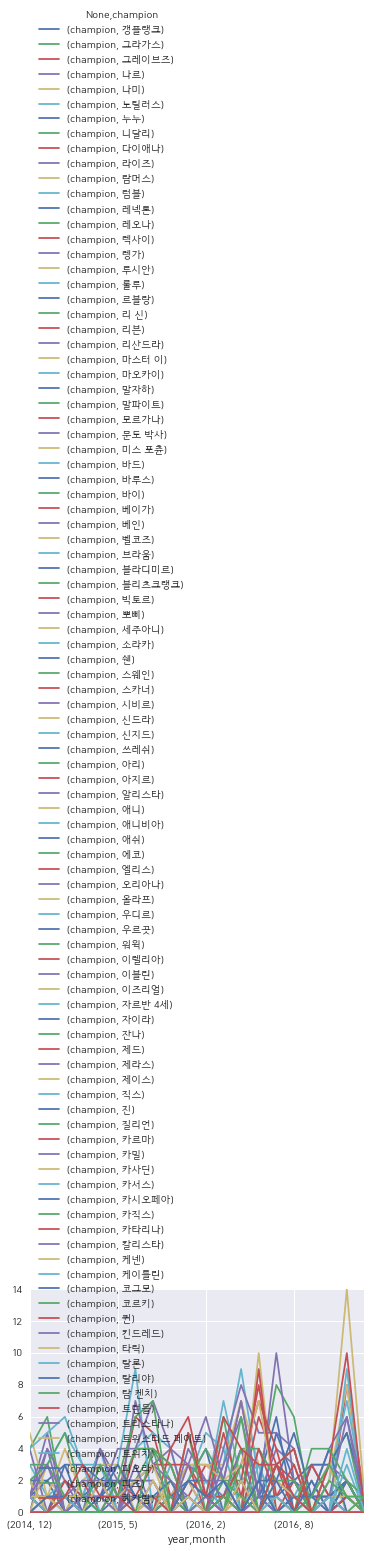

In [102]:
yearmonth_use_champion.plot()

In [68]:
# 대회당 평균 K,D,A
player_df.groupby(['title'])[['K','D','A','KDA']].mean()

,K,D,A,KDA
title,,,,
2015 롤챔스 코리아 프리시즌,3.820000,1.900000,9.380000,9.410000
2015 스베누 롤챔스 코리아 섬머,3.282927,1.902439,7.287805,7.667317
2015 스베누 롤챔스 코리아 섬머 포스트 시즌,4.000000,1.800000,8.133333,8.273333
2015 스베누 롤챔스 코리아 스프링,3.050000,2.218750,7.231250,7.327500
2015 스베누 롤챔스 코리아 스프링 포스트시즌,3.350000,2.175000,8.725000,8.022500
2016 꼬깔콘 롤챔스 코리아 스프링,2.385366,1.800000,5.887805,6.442439
2016 꼬깔콘 롤챔스 코리아 스프링 PS,2.909091,1.581818,7.472727,7.941818
2016 롤챔스 코리아 섬머 포스트 시즌,1.560000,2.840000,4.640000,4.116000
2016 코카콜라 제로 롤챔스 코리아 섬머,2.541463,2.082927,6.321951,6.333171


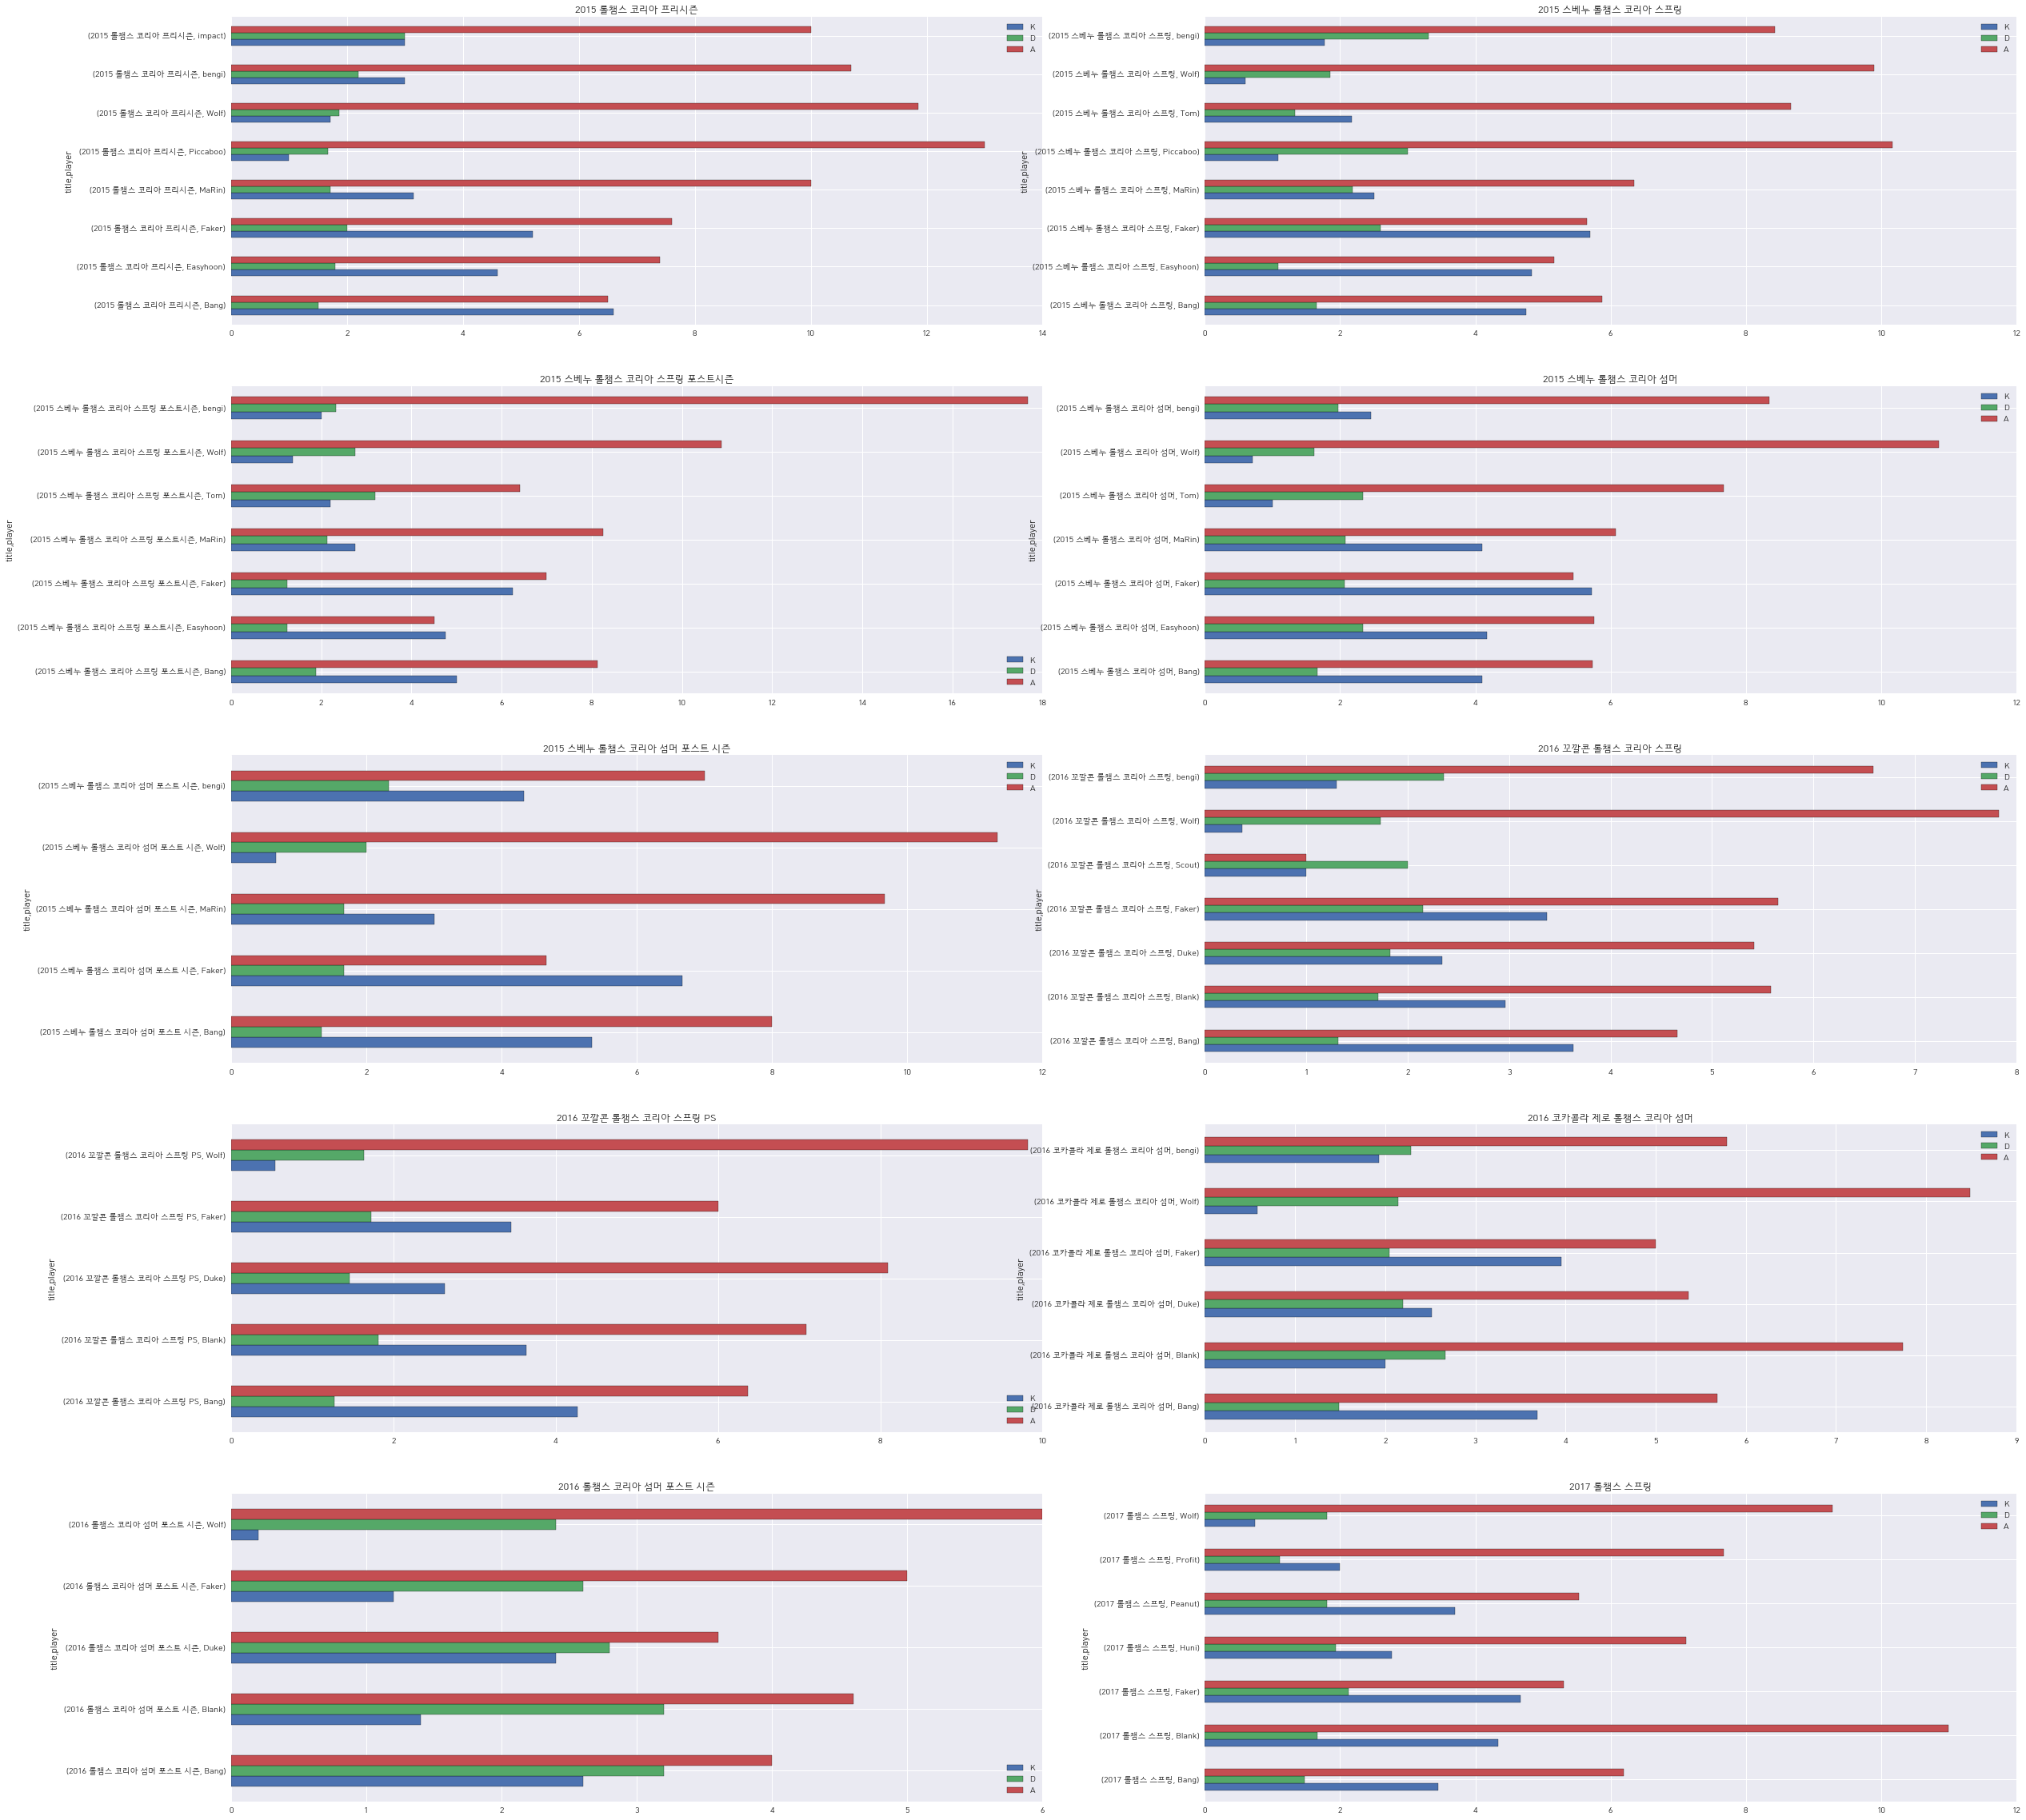

In [91]:
f2,a2 = plt.subplots(5,2)
player_df.groupby(['title','player'])[['K','D','A']].mean().query('title==["2015 롤챔스 코리아 프리시즌"]').plot(kind="barh", figsize=[40,40], ax=a2[0][0], title="2015 롤챔스 코리아 프리시즌")
player_df.groupby(['title','player'])[['K','D','A']].mean().query('title==["2015 스베누 롤챔스 코리아 스프링"]').plot(kind="barh", figsize=[40,40],ax=a2[0][1], title="2015 스베누 롤챔스 코리아 스프링")
player_df.groupby(['title','player'])[['K','D','A']].mean().query('title==["2015 스베누 롤챔스 코리아 스프링 포스트시즌"]').plot(kind="barh", figsize=[40,40],ax=a2[1][0],title="2015 스베누 롤챔스 코리아 스프링 포스트시즌")
player_df.groupby(['title','player'])[['K','D','A']].mean().query('title==["2015 스베누 롤챔스 코리아 섬머"]').plot(kind="barh", figsize=[40,40],ax=a2[1][1], title="2015 스베누 롤챔스 코리아 섬머")
player_df.groupby(['title','player'])[['K','D','A']].mean().query('title==["2015 스베누 롤챔스 코리아 섬머 포스트 시즌"]').plot(kind="barh", figsize=[40,40],ax=a2[2][0], title="2015 스베누 롤챔스 코리아 섬머 포스트 시즌")
player_df.groupby(['title','player'])[['K','D','A']].mean().query('title==["2016 꼬깔콘 롤챔스 코리아 스프링"]').plot(kind="barh", figsize=[40,40],ax=a2[2][1],title="2016 꼬깔콘 롤챔스 코리아 스프링")
player_df.groupby(['title','player'])[['K','D','A']].mean().query('title==["2016 꼬깔콘 롤챔스 코리아 스프링 PS"]').plot(kind="barh", figsize=[40,40],ax=a2[3][0],title="2016 꼬깔콘 롤챔스 코리아 스프링 PS")
player_df.groupby(['title','player'])[['K','D','A']].mean().query('title==["2016 코카콜라 제로 롤챔스 코리아 섬머"]').plot(kind="barh", figsize=[40,40],ax=a2[3][1], title="2016 코카콜라 제로 롤챔스 코리아 섬머")
player_df.groupby(['title','player'])[['K','D','A']].mean().query('title==["2016 롤챔스 코리아 섬머 포스트 시즌"]').plot(kind="barh", figsize=[40,40],ax=a2[4][0],title="2016 롤챔스 코리아 섬머 포스트 시즌")
player_df.groupby(['title','player'])[['K','D','A']].mean().query('title==["2017 롤챔스 스프링"]').plot(kind="barh", figsize=[40,40],ax=a2[4][1],title="2017 롤챔스 스프링")

In [92]:
f2.savefig('bbb.png')